In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
import pickle
sns.set()

In [2]:
data = pd.read_csv("heart_data.csv")

In [3]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,28,1,2,130,132,0,2,185,0,0.0,?,?,?,0
1,29,1,2,120,243,0,0,160,0,0.0,?,?,?,0
2,29,1,2,140,?,0,0,170,0,0.0,?,?,?,0
3,30,0,1,170,237,0,1,170,0,0.0,?,?,6,0
4,31,0,2,100,219,0,1,150,0,0.0,?,?,?,0


In [4]:
data.drop(columns = ["slope","ca","thal"], inplace  = True  )

In [5]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,?,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [6]:
data["trestbps"].unique()

array(['130', '120', '140', '170', '100', '105', '110', '125', '150',
       '98', '112', '145', '190', '160', '115', '142', '180', '132',
       '135', '?', '108', '124', '113', '122', '92', '118', '106', '200',
       '138', '136', '128', '155'], dtype=object)

In [7]:
data["trestbps"].replace(["?"],np.nan, inplace = True)

In [8]:
data["trestbps"].isna().sum()

1

In [9]:
data["trestbps"].fillna(data["trestbps"].median(), inplace  =True)

In [10]:
data["trestbps"].unique()

array(['130', '120', '140', '170', '100', '105', '110', '125', '150',
       '98', '112', '145', '190', '160', '115', '142', '180', '132',
       '135', 130.0, '108', '124', '113', '122', '92', '118', '106',
       '200', '138', '136', '128', '155'], dtype=object)

In [11]:
data["chol"].replace(["?"],np.nan, inplace  =True)

In [12]:
data["chol"].fillna(data["chol"].median(), inplace = True)

In [13]:
data["chol"].unique()

array(['132', '243', 243.0, '237', '219', '198', '225', '254', '298',
       '161', '214', '220', '160', '167', '308', '264', '166', '340',
       '209', '260', '211', '173', '283', '194', '223', '315', '275',
       '297', '292', '182', '200', '204', '241', '339', '147', '273',
       '307', '289', '215', '281', '250', '184', '245', '291', '295',
       '269', '196', '268', '228', '358', '201', '249', '266', '186',
       '207', '218', '412', '224', '238', '230', '163', '240', '280',
       '257', '263', '276', '284', '195', '227', '253', '187', '202',
       '328', '168', '216', '129', '190', '188', '179', '210', '272',
       '180', '100', '259', '468', '274', '320', '221', '309', '312',
       '171', '208', '246', '305', '217', '365', '344', '394', '256',
       '326', '277', '270', '229', '85', '347', '251', '222', '287',
       '318', '213', '294', '193', '271', '156', '267', '282', '117',
       '466', '247', '226', '265', '206', '288', '303', '338', '248',
       '306', '529', 

In [14]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,243.0,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [15]:
data["fbs"].value_counts()

0    266
1     20
?      8
Name: fbs, dtype: int64

In [16]:
data["fbs"].replace(["?"], np.nan , inplace = True)

In [17]:
data["fbs"].fillna(data["fbs"].median(), inplace = True)

In [18]:
data["fbs"].replace([0.0],[0], inplace = True)

In [19]:
data["fbs"].unique()

array([0, 1], dtype=int64)

In [20]:
data["restecg"].replace(["?"],np.nan, inplace = True)

In [21]:
data["restecg"].value_counts()

0    235
1     52
2      6
Name: restecg, dtype: int64

In [22]:
data["restecg"].fillna(0, inplace = True)

In [23]:
data["restecg"].unique()

array(['2', '0', '1', 0], dtype=object)

In [24]:
data["thalach"].replace(["?"],np.nan, inplace =True)

In [25]:
data["thalach"].fillna(data["thalach"].median(), inplace =True)

In [26]:
data["thalach"].unique()

array(['185', '160', '170', '150', '165', '184', '155', '190', '168',
       '180', '178', '172', '130', '142', '98', '158', '129', '146',
       '145', '120', '106', '132', '140', '138', '167', '188', '144',
       '137', '136', '152', '175', '176', '118', '154', '115', '135',
       '122', '110', '90', '116', '174', '125', 140.0, '148', '100',
       '164', '139', '127', '162', '112', '134', '114', '128', '126',
       '124', '153', '166', '103', '156', '87', '102', '92', '99', '121',
       '91', '108', '96', '82', '105', '143', '119', '94'], dtype=object)

In [27]:
data["exang"].unique()

array(['0', '1', '?'], dtype=object)

In [28]:
data["exang"].value_counts()

0    204
1     89
?      1
Name: exang, dtype: int64

In [29]:
data["exang"].replace(["?"], np.nan, inplace  = True)

In [30]:
data["exang"].fillna(0, inplace=True)

In [31]:
data["exang"].unique()

array(['0', '1', 0], dtype=object)

In [32]:
data['oldpeak'].unique()

array([0. , 1. , 2. , 1.5, 0.5, 3. , 0.8, 2.5, 4. , 5. ])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    object 
 4   chol        294 non-null    object 
 5   fbs         294 non-null    int64  
 6   restecg     294 non-null    object 
 7   thalach     294 non-null    object 
 8   exang       294 non-null    object 
 9   oldpeak     294 non-null    float64
 10  num         294 non-null    int64  
dtypes: float64(1), int64(5), object(5)
memory usage: 25.4+ KB


In [34]:
data[["trestbps","chol","restecg","thalach","exang"]] = data[["trestbps","chol","restecg","thalach","exang"]].astype(int)

In [35]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294 entries, 0 to 293
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         294 non-null    int64  
 1   sex         294 non-null    int64  
 2   cp          294 non-null    int64  
 3   trestbps    294 non-null    int32  
 4   chol        294 non-null    int32  
 5   fbs         294 non-null    int64  
 6   restecg     294 non-null    int32  
 7   thalach     294 non-null    int32  
 8   exang       294 non-null    int32  
 9   oldpeak     294 non-null    float64
 10  num         294 non-null    int64  
dtypes: float64(1), int32(5), int64(5)
memory usage: 19.6 KB


In [36]:
data.isna().sum()

age           0
sex           0
cp            0
trestbps      0
chol          0
fbs           0
restecg       0
thalach       0
exang         0
oldpeak       0
num           0
dtype: int64

In [37]:
data.keys()

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'num       '],
      dtype='object')

In [38]:
data["num"] = data["num       "]

In [39]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num,num
0,28,1,2,130,132,0,2,185,0,0.0,0,0
1,29,1,2,120,243,0,0,160,0,0.0,0,0
2,29,1,2,140,243,0,0,170,0,0.0,0,0
3,30,0,1,170,237,0,1,170,0,0.0,0,0
4,31,0,2,100,219,0,1,150,0,0.0,0,0


In [40]:
data.drop(columns = ["num       "], inplace  =True)

In [41]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,243,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [42]:
data["num"].unique()

array([0, 1], dtype=int64)

c:\users\manoj\appdata\local\programs\python\python37\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='num', ylabel='count'>

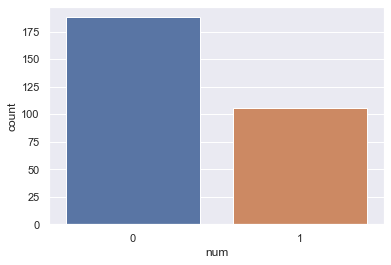

In [43]:
sns.countplot(data['num'])

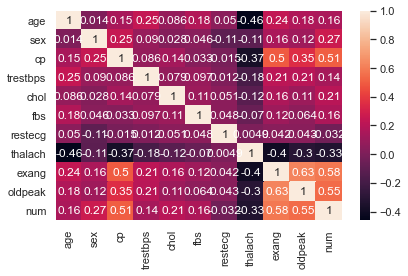

<Figure size 2160x2160 with 0 Axes>

In [44]:
sns.heatmap(data.corr(), annot = True)
plt.tight_layout()
plt.figure(figsize = (30,30))
plt.show()

In [52]:
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,num
0,28,1,2,130,132,0,2,185,0,0.0,0
1,29,1,2,120,243,0,0,160,0,0.0,0
2,29,1,2,140,243,0,0,170,0,0.0,0
3,30,0,1,170,237,0,1,170,0,0.0,0
4,31,0,2,100,219,0,1,150,0,0.0,0


In [53]:
x = data.drop(columns = ["num",'sex','fbs','restecg','thalach','exang','oldpeak'])
y = data["num"]

In [61]:
x

,age,cp,trestbps,chol
0,28,2,130,132
1,29,2,120,243
2,29,2,140,243
3,30,1,170,237
4,31,2,100,219
...,...,...,...,...
289,52,4,160,331
290,54,3,130,294
291,56,4,155,342
292,58,2,180,393


In [54]:
x_train, x_test, y_train,y_test = train_test_split(x,y, random_state = 0)

In [55]:
lgr = LogisticRegression(C=1.5, n_jobs = 5)
lgr.fit(x_train,y_train)
pre = lgr.predict(x_test)

In [56]:
print(round(accuracy_score(pre, y_test)*100),"%")

81 %


In [57]:
confusion_matrix(pre,y_test)

array([[39,  9],
       [ 5, 21]], dtype=int64)

In [58]:
print(classification_report(pre,y_test))

              precision    recall  f1-score   support

           0       0.89      0.81      0.85        48
           1       0.70      0.81      0.75        26

    accuracy                           0.81        74
   macro avg       0.79      0.81      0.80        74
weighted avg       0.82      0.81      0.81        74



In [59]:
pickle.dump(lgr,open('heart.pkl','wb'))

In [60]:
lgr.predict([[28,130,132,2]])

array([1], dtype=int64)